In [1]:
from google.colab import files
uploaded=files.upload()

Saving mymoviedb.csv to mymoviedb.csv


In [5]:
#importing necessary libraries
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#to read the content of the file
# df=pd.read_csv('mymoviesdb.csv' , lineterminator='\n')
file_content = io.BytesIO(uploaded['mymoviedb.csv']).read().decode(errors='replace')

In [10]:
# Convert string to file-like object
df = pd.read_csv(io.StringIO(file_content), lineterminator='\n')

# Show the first few rows
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


**Perform Data Preprocessing**
Missing values , Data types , convert date(object) to date(date type) , remove unnecessary columns


In [11]:
#to get basic information of the data set
df.info()
#from the info , we get that date is also object type which we need to convert to date type , we have 9827 data , seems there is no missing values , considering whitespace, duplicate data,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [12]:
#to view the column data for column 'Genre'
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [14]:
#to check if there exists duplicated data
df.duplicated().sum()

np.int64(0)

In [16]:
#to get basic statistics of the data table ; can be only calcualated in numerical value
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


**Exploration Summary : **
We dont have NaN or null values for data
We have a dataframe with 9827 rows and 9 columns
Release_Date column needs to be converted to Date type from Object type
For Release_Date, only Year is needed
Drop column such as Language, Overview , Url
Adding label to make the column like Vote_Average more readable
Column 'Genre' has comma separated data which we need to cast into the category




In [17]:
#convert date into date type from object type
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [21]:
#to find the types of release year and only keep Year in the Release_Date
df['Release_Year'] = df['Release_Date'].dt.year
print(df['Release_Year'].dtypes) #integer
df['Release_Date'] =df['Release_Year']
df.head()

int32


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Year
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021


In [23]:

#remove unnecessary column(droping the columns)
#axis=1 => drop columns
unnecessary_column=['Overview' , 'Original_Language' , 'Poster_Url']
df.drop(unnecessary_column, axis=1, inplace=True)

KeyError: "['Overview', 'Original_Language', 'Poster_Url'] not found in axis"

In [26]:
df.columns
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",2021
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",2022
2,2022,No Exit,2618.087,122,6.3,Thriller,2022
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",2021
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",2021


Categorizing labels for 'Vote_Average' column Popular , Below_Avg, Average , Not_Popular using categorize_col()

In [42]:
#labels
def categorize_col(df, col , labels):
  edges=[
        df[col].min(),
        df[col].quantile(0.25),
        df[col].median(),
        df[col].quantile(0.75),
        df[col].max()
        ]
  df[col]=pd.cut(df[col] , edges, labels=labels, duplicates='drop' , include_lowest=True)
  return df

labels=['Not_Popular' , 'Below_Avg', 'Average' , 'Popular']
# categorize_col(df, 'Vote_Average', labels)

In [45]:

df['Vote_Average'].unique()
df['Vote_Average'].head()

,Vote_Average
0,Popular
1,Popular
2,Below_Avg
3,Popular
4,Average


In [46]:
#to find number of the movies with different labels
df['Vote_Average'].value_counts()

,count
Vote_Average,
Not_Popular,2467
Popular,2450
Average,2412
Below_Avg,2398


In [47]:
#to check if there exists any duplicate or NaN values
df.dropna(inplace=True)

df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0
Release_Year,0


In [50]:
df.drop('Release_Year', axis=1, inplace=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_Avg,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


We need to split the genre iinto list so that for each genre the movie belongs to , it is shown accordingly (explode the dataframe)

In [51]:
df['Genre'] =df['Genre'].str.split(', ') #separating with ,
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [52]:
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [53]:
df.nunique()#to know number of unique value for each column

,0
Release_Date,100
Title,9415
Popularity,8088
Vote_Count,3265
Vote_Average,4
Genre,19


Data Preprocessing done until here now I am going to do data visualization

In [54]:
sns.set_style('whitegrid')

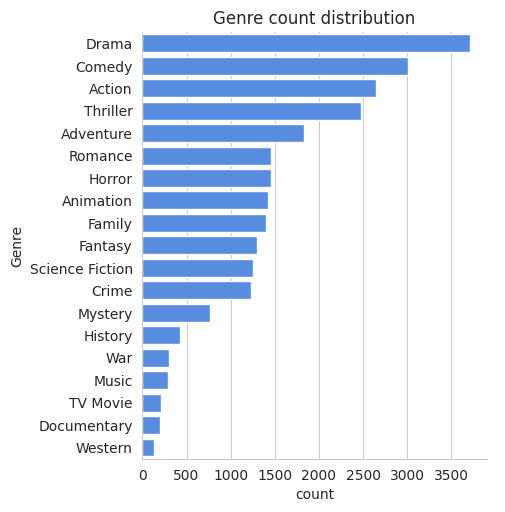

In [56]:
# What is the most frequent genre released on Netflix?
df['Genre'].describe()
sns.catplot(y='Genre' , data=df, kind='count',
            order=df['Genre'].value_counts().index,
            color='#4287f5'
            )
plt.title("Genre count distribution")
plt.show()

Text(0.5, 1.0, 'Vote Average Distribution')

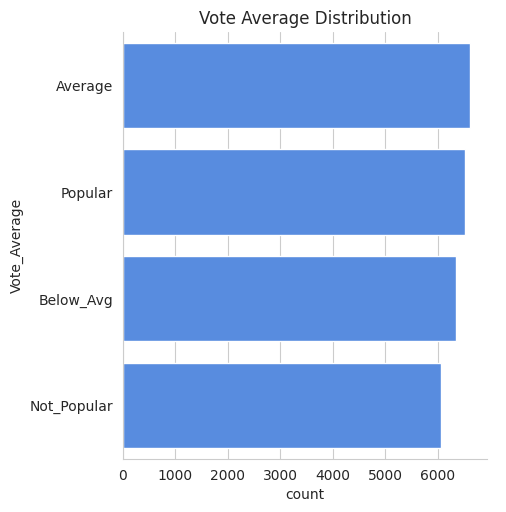

In [60]:
# Which has the highest votes in vote average column
df['Vote_Average'].describe()
sns.catplot(y='Vote_Average' , data=df ,kind='count',
            order=df['Vote_Average'].value_counts().index,
            color='#4287f5'
            )
plt.title('Vote Average Distribution')
plt.show()

In [61]:
#What is the popular movie and what's its genre?
df[df['Popularity'] == df['Popularity'].max()]
#Answer=>Action, Adventure , Science Fiction

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


In [62]:
#What is the least popular movie and what's its genre?
df[df['Popularity'] == df['Popularity'].min()]
#Answer => Least popular movie genre are Music , Drama , History , War , Science Fiction

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25549,1984,Threads,13.354,186,Popular,War
25550,1984,Threads,13.354,186,Popular,Drama
25551,1984,Threads,13.354,186,Popular,Science Fiction


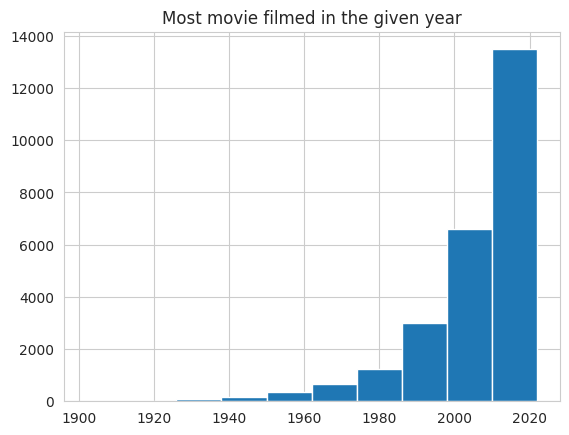

In [63]:
#Which year has the most movie filmed?
df['Release_Date'].hist()
plt.title("Most movie filmed in the given year")
plt.show()
#Answer : In 2020 , most number of movie is filmed